## Table Of Contents: <a class='anchor' id='back-to-top'></a>
1. [Data Insights](#data-insights)  


2. [Data Visualization](#data-visualization)  


3. [Covid Related Posts](#covid-related-posts)  


4. [Sentiment Analysis](#sentiment-analysis) 
    * [Raw Analysis with vader](#raw-sa-with-vader)
    * [Data Cleaning](#data-cleaning)
    * [Analysis with vader](#sa-with-vader)
    * [Analysis with nltk](#sa-with-nltk)
    * [Analysis with textblob](#sa-with-tb)
    * [Analysis with roberta](#sa-with-roberta)
    * [Wordclouds](#wordcloud-subs)

In [461]:
import numpy as np
import pandas as pd
import tqdm
import os
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
%matplotlib inline

import datetime as dt
import ciso8601

from datetime import timedelta
from pprintpp import pprint as pp
from termcolor import colored
from wordcloud import WordCloud, STOPWORDS
from statistics import mean

sns.set_style('darkgrid')
sns.set_context('paper')
style.use('ggplot')
matplotlib.rcParams['font.family'] = 'helvetica'
matplotlib.rcParams['figure.titlesize'] = 'large'

In [87]:
path = './submissions_scraped/'

files = []
for filename in os.listdir(path):
    files.append(pd.read_csv(os.path.join(path, filename)))
    
files = pd.concat(files)
df_submissions = pd.DataFrame(files)
df_submissions.drop(columns=['Unnamed: 0'], inplace=True)

In [88]:
df_comments = pd.read_csv('./comments_scraped/comments.csv')
df_comments.drop(columns=['Unnamed: 0'], inplace=True)

## Data Insights <a class="anchor" id="data-insights"></a>

[Back to top](#back-to-top)

In [89]:
subreddits = ['CrohnsDisease', 'IBD', 'UlcerativeColitis', 'ibs']
colors = ['#cc5a49', '#4586ac', '#9e97cc', '#777777']

df_submissions['created'] = pd.to_datetime(df_submissions['created'])
df_comments['created'] = pd.to_datetime(df_comments['created'])

df_crohns = df_submissions[df_submissions['subreddit'] == 'CrohnsDisease']
df_ibs = df_submissions[df_submissions['subreddit'] == 'ibs']
df_ibd = df_submissions[df_submissions['subreddit'] == 'IBD']
df_ulc = df_submissions[df_submissions['subreddit'] == 'UlcerativeColitis']

crohns_comments_scraped = df_comments[df_comments['subreddit'] == 'CrohnsDisease']['id'].count()
ulc_comments_scraped = df_comments[df_comments['subreddit'] == 'UlcerativeColitis']['id'].count()
ibs_comments_scraped = df_comments[df_comments['subreddit'] == 'ibs']['id'].count()
ibd_comments_scraped = df_comments[df_comments['subreddit'] == 'IBD']['id'].count()

In [90]:
print(colored('SUBMISSIONS\n', color='blue', attrs=['bold']))

print(f'\tNumber of subsmissions:\t\t{df_submissions.shape[0]}\n')
print(f'\tNumber of authors:\t\t{df_submissions.author.isnull().sum()}\n')
print('\tW\ at least 1 comment:\t\t', len(df_submissions[df_submissions['num_comments'] > 0]), '\n')

print(colored('COMMENTS\n', color='blue', attrs=['bold']))

print(f'\tNumber of comments:\t\t{df_comments.shape[0]}\n')

print(colored('SUBREDDITS\n', color='blue', attrs=['bold']))
print(f'\tSubreddits scraped: \t{subreddits}\n')

print(colored('\tr/CrohnsDisease\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_crohns.shape[0]}\n')
print(f'\t\tNumber of comments:\t{df_crohns.num_comments.sum()}\n')
print(f'\t\tComments scareped:\t{crohns_comments_scraped}\n')

print(colored('\tr/UlcerativeColitis\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ulc.shape[0]}\n')
print(f'\t\tNumber of comments:\t{df_ulc.num_comments.sum()}\n')
print(f'\t\tComments scareped:\t{ulc_comments_scraped}\n')

print(colored('\tr/ibs\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ibs.shape[0]}\n')
print(f'\t\tNumber of comments:\t{df_ibs.num_comments.sum()}\n')
print(f'\t\tComments scareped:\t{ibs_comments_scraped}\n')

print(colored('\tr/IBD\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ibd.shape[0]}\n')
print(f'\t\tNumber of comments:\t{df_ibd.num_comments.sum()}\n')
print(f'\t\tComments scareped:\t{ibd_comments_scraped}\n')

print(colored('EMPTY VALUES SUBMISSIONS\n', color='blue', attrs=['bold']))
print(df_submissions.isnull().sum().sort_values(ascending = False), '\n')

print(colored('EMPTY VALUES COMMENTS\n', color='blue', attrs=['bold']))
print(df_comments.isnull().sum().sort_values(ascending = False), '\n')

SUBMISSIONS

	Number of subsmissions:		78646

	Number of authors:		22294

	W\ at least 1 comment:		 69287 

COMMENTS

	Number of comments:		347556

SUBREDDITS

	Subreddits scraped: 	['CrohnsDisease', 'IBD', 'UlcerativeColitis', 'ibs']

	r/CrohnsDisease

		Number of submissions:	21475

		Number of comments:	224886

		Comments scareped:	119197

	r/UlcerativeColitis

		Number of submissions:	16680

		Number of comments:	155694

		Comments scareped:	82352

	r/ibs

		Number of submissions:	36583

		Number of comments:	285211

		Comments scareped:	130085

	r/IBD

		Number of submissions:	3908

		Number of comments:	30980

		Comments scareped:	15922

EMPTY VALUES SUBMISSIONS

author          22294
url             20066
body             9075
title               0
score               0
id                  0
subreddit           0
num_comments        0
created             0
dtype: int64 

EMPTY VALUES COMMENTS

author       15704
parent_id        0
score            0
id               0
subreddit 

## Data Visualization <a class="anchor" id="data-visualization"></a>

[Back to top](#back-to-top)

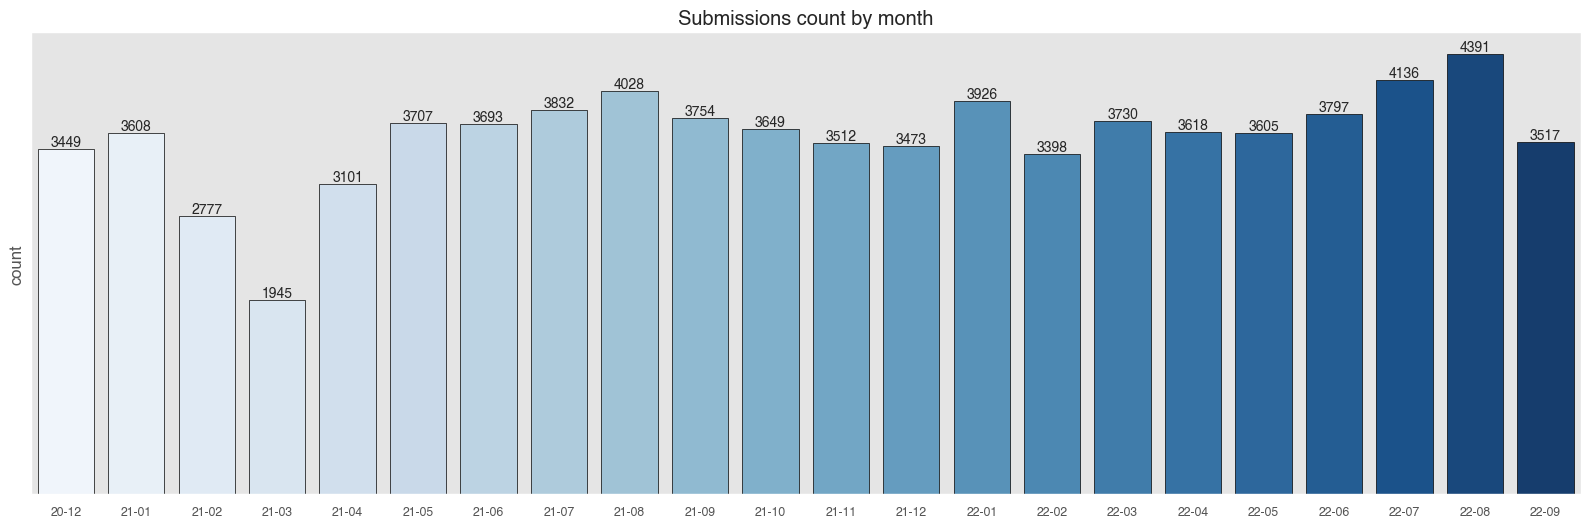

In [91]:
submissions_per_month = df_submissions['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

plt.figure(figsize=(20,6))
ax = sns.barplot(x='index', y='counts', data=submissions_per_month, edgecolor='black', palette='Blues')
plt.title('Submissions count by month')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')

plt.show()

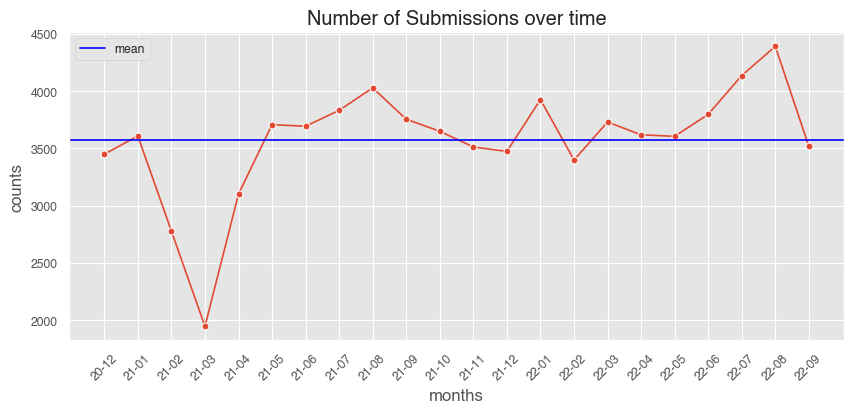

In [92]:
submissions_per_month = df_submissions['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

subs_per_month_df = pd.DataFrame(submissions_per_month)

subs_per_month_df = subs_per_month_df.rename(columns={'index': 'months'}).reset_index()

plt.figure(figsize=(10, 4))
plt.title('Number of Submissions over time')
sns.lineplot(x=subs_per_month_df.months, y=subs_per_month_df.counts, marker='o', markersize=5);
plt.xticks(rotation = 45)
plt.axhline(subs_per_month_df.counts.mean(), color='b', label='mean')

plt.legend()
plt.show();

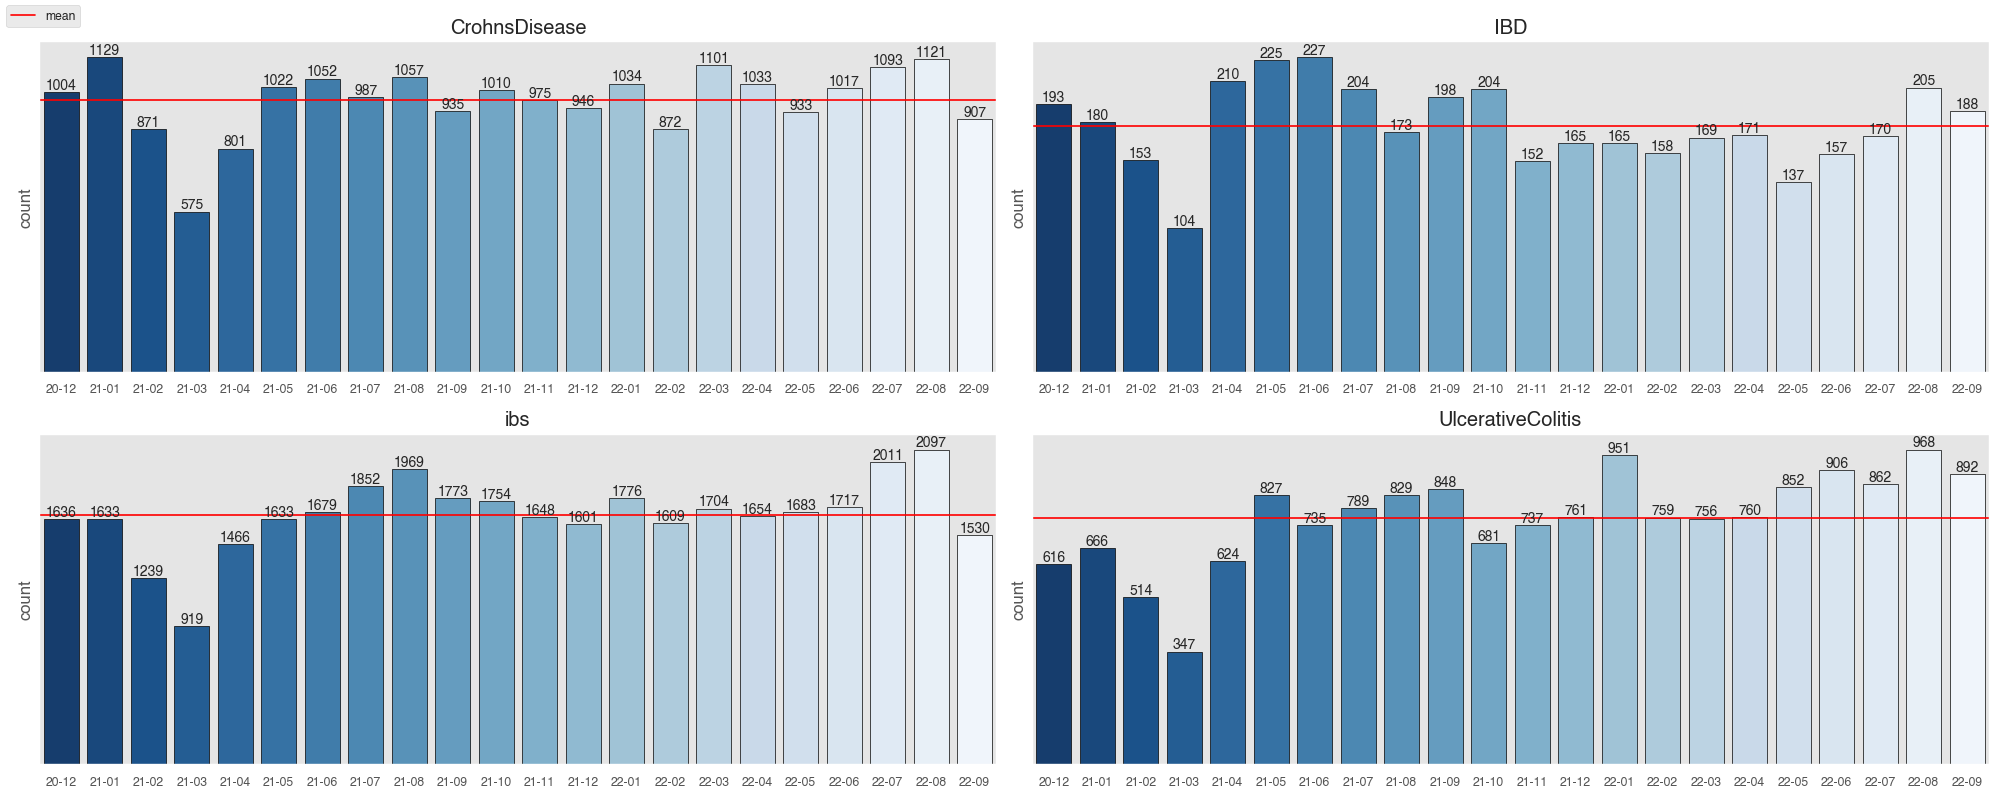

In [93]:
subs_per_month_per_subreddits = []
subs_per_month_per_subreddits.append(df_crohns['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ibd['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ibs['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ulc['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(20,8), nrows=2, ncols=2)

ax1 = sns.barplot(x='index', y='counts', data=subs_per_month_per_subreddits[0], edgecolor='black', palette='Blues_r', ax=ax1)
ax1.set_title('CrohnsDisease')
ax1.set_yticks([])
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel('count')
ax1.set_xlabel('')
ax1.axhline(subs_per_month_per_subreddits[0].counts.mean(), color='r')

ax2 = sns.barplot(x='index', y='counts', data=subs_per_month_per_subreddits[1], edgecolor='black', palette='Blues_r', ax=ax2)
ax2.set_title('IBD')
ax2.set_yticks([])
ax2.bar_label(ax2.containers[0])
ax2.set_ylabel('count')
ax2.set_xlabel('')
ax2.axhline(subs_per_month_per_subreddits[1].counts.mean(), color='r')

ax3 = sns.barplot(x='index', y='counts', data=subs_per_month_per_subreddits[2], edgecolor='black', palette='Blues_r', ax=ax3)
ax3.set_title('ibs')
ax3.set_yticks([])
ax3.bar_label(ax3.containers[0])
ax3.set_ylabel('count')
ax3.set_xlabel('')
ax3.axhline(subs_per_month_per_subreddits[2].counts.mean(), color='r')

ax4 = sns.barplot(x='index', y='counts', data=subs_per_month_per_subreddits[3], edgecolor='black', palette='Blues_r', ax=ax4)
ax4.set_title('UlcerativeColitis')
ax4.set_yticks([])
ax4.bar_label(ax4.containers[0])
ax4.set_ylabel('count')
ax4.set_xlabel('')
ax4.axhline(subs_per_month_per_subreddits[3].counts.mean(), color='r', label='mean')

fig.legend(loc='upper left')
fig.tight_layout()
plt.show()

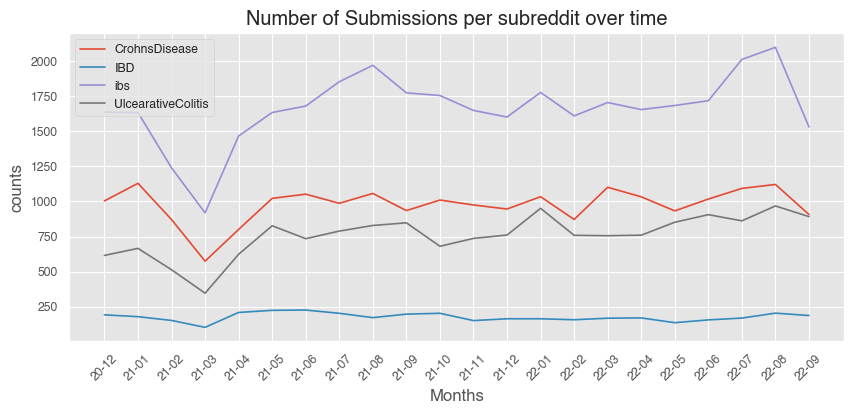

In [160]:
subs_per_month_per_subreddits = []
subs_per_month_per_subreddits.append(df_crohns['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ibd['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ibs['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
subs_per_month_per_subreddits.append(df_ulc['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))

plt.figure(figsize=(10, 4))
plt.title('Number of Submissions per subreddit over time')
sns.lineplot(x='index', y='counts', data=subs_per_month_per_subreddits[0], label='CrohnsDisease');
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=subs_per_month_per_subreddits[1], label='IBD');
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=subs_per_month_per_subreddits[2], label='ibs');
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=subs_per_month_per_subreddits[3], label='UlcearativeColitis');
plt.xticks(rotation = 45)

plt.xlabel('Months')
plt.show();

In [161]:
most_upvotes = df_submissions[['title', 'author', 'subreddit', 'score']].sort_values(by='score', ascending=False)
most_upvotes.dropna(inplace=True)
most_upvotes = most_upvotes.iloc[:10]

print(colored('\nSubmissions with more upvotes', color='blue'))
display(most_upvotes)


Submissions with more upvotes


,title,author,subreddit,score
2070,Rule #1 : Pictures of poop are no longer accepted,m-p-3,ibs,1045
9900,Warning for those who think they have IBS,heidigwotr,ibs,771
9212,My butthole is going to be famous,MirrorBride,CrohnsDisease,720
33466,Does anyone ever think about how it’s crazy th...,brianamaribel,ibs,618
20515,PLEASE STOP POSTING PICTURES OF POOP. EVEN SPE...,peeved151,ibs,606
682,the only thing worse than an IBS flare up is a...,whereisthe-711,ibs,600
434,I'm getting the Pfizer vaccine tomorrow,LetsEatPizza,CrohnsDisease,562
12765,If i hear one more person tell me to eat more ...,AdministrationWitty,ibs,553
9711,Forget poop for just one second...CAN WE TALK ...,kateforddd,ibs,535
29966,Bf broke up with me bc of IBS,vegoon_trash,ibs,505


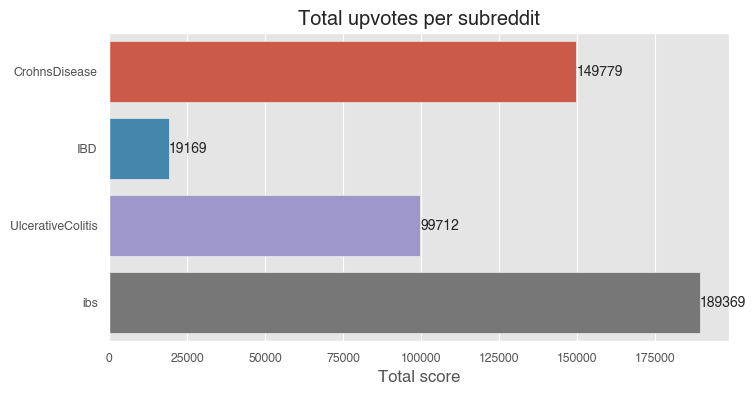

In [162]:
fig, ax1 = plt.subplots(figsize=(8,4))

sns.barplot(y=subreddits, x=df_submissions.groupby('subreddit').score.sum().sort_index(), ax=ax1)
ax1.set_title('Total upvotes per subreddit')
ax1.set_xlabel('Total score')
ax1.bar_label(ax1.containers[0])
plt.show();

In [163]:
more_comments = df_submissions[['title', 'author', 'subreddit', 'num_comments']]
more_comments = more_comments.sort_values(by='num_comments', ascending=False)
more_comments.dropna(inplace=True)

print(colored('\nSubmissions with more comments', color='blue'))
display(more_comments.iloc[0:10])


Submissions with more comments


,title,author,subreddit,num_comments
32078,PSA: your IBS-C may not be IBS-C,goldstandardalmonds,ibs,535
26865,"What ""bad"" food surprisingly DOESN'T upset you...",RedditHermanita,ibs,369
18553,Where my Crohnies at?,alexeatsit,CrohnsDisease,345
2467,Tell me you have Crohns without TELLING me you...,cmajor47,CrohnsDisease,302
19879,How old were you when you were diagnosed with ...,555louisa,CrohnsDisease,301
11761,I can’t take it anymore,bootsandchoker,ibs,300
20781,5th Covid vaccine,Poseylady,CrohnsDisease,277
24103,Does anyone just ever sit and realize how thei...,goldstandardalmonds,ibs,265
31592,Your best IBS hacks! Post them here.,AutoModerator,ibs,258
25036,I'm begging people to stop exaggerating about ...,backbaymentioner,ibs,245


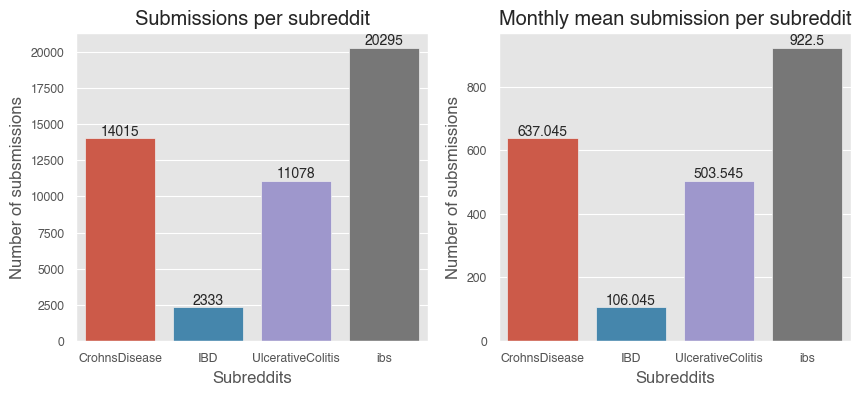

In [164]:
fig, [ax1, ax2] = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
sns.barplot(x=subreddits, y=df_submissions.subreddit.value_counts().sort_index(), ax=ax1)
ax1.set_title('Submissions per subreddit')
ax1.set_ylabel('Number of subsmissions')
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel('Subreddits')

sns.barplot(x=subreddits, y=df_submissions.subreddit.value_counts().sort_index() / len(df_submissions['created'].dt.strftime('%y-%m').value_counts()), ax=ax2)
ax2.set_title('Monthly mean submission per subreddit')
ax2.set_ylabel('Number of subsmissions')
ax2.set_xlabel('Subreddits')
ax2.bar_label(ax2.containers[0])

plt.show();

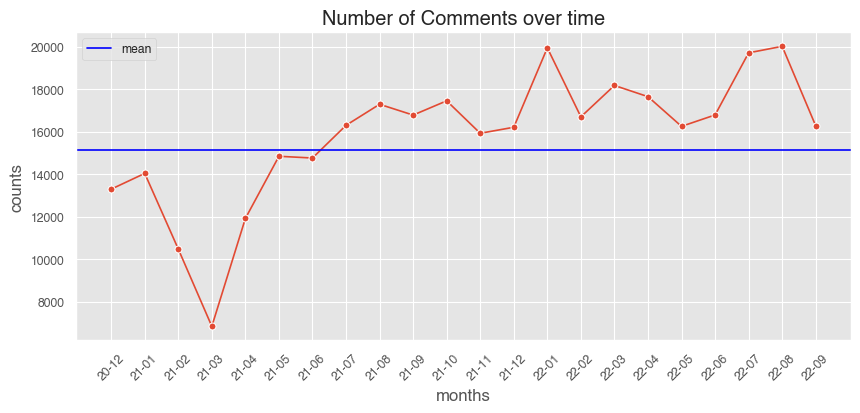

In [99]:
comments_per_month = df_comments['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

comments_per_month_df = pd.DataFrame(comments_per_month)

comments_per_month_df = comments_per_month_df.rename(columns={'index': 'months'}).reset_index()

plt.figure(figsize=(10, 4))
plt.title('Number of Comments over time')
sns.lineplot(x=subs_per_month_df.months, y=comments_per_month_df.counts, marker='o', markersize=5);
plt.xticks(rotation = 45)
plt.axhline(comments_per_month.counts.mean(), color='b', label='mean')

plt.legend()
plt.show();

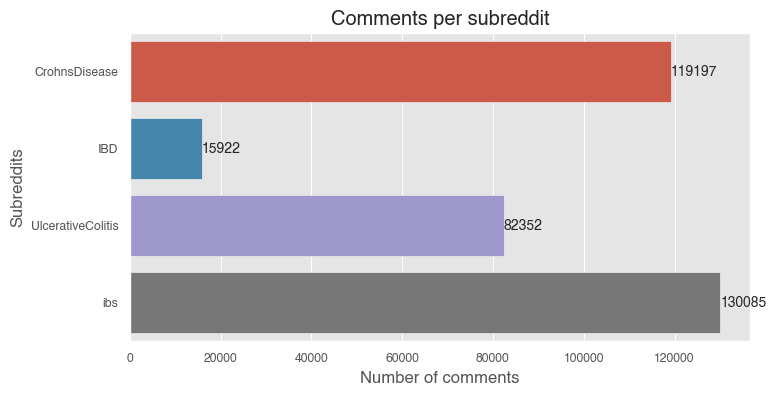

In [166]:
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(y=subreddits, x=df_comments.groupby('subreddit')['id'].count().sort_index(), orient='h', ax=ax)

ax.set_title('Comments per subreddit')
ax.set_xlabel('Number of comments')
ax.set_ylabel('Subreddits')
ax.bar_label(ax.containers[0])

plt.show();

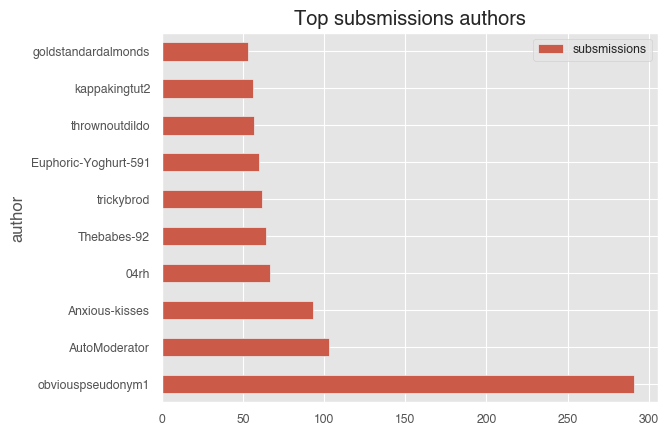

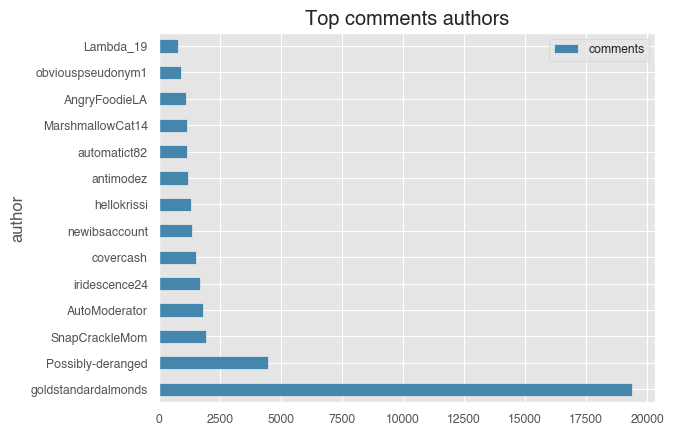

In [110]:
rank_submissions = df_submissions[['author', 'body']].groupby('author').count().sort_values('body', ascending=False)
rank_submissions.columns = ['count']
rank_submissions = rank_submissions[rank_submissions['count'] > 50]
rank_submissions.rename(columns={'count': 'subsmissions'}, inplace=True)

rank_comments = df_comments[['author', 'body']].groupby('author').count().sort_values('body', ascending=False)
rank_comments.columns = ['count']
rank_comments = rank_comments[rank_comments['count'] > 700]
rank_comments.rename(columns={'count': 'comments'}, inplace=True)

rank_submissions.plot(
    color=colors[0],
    kind='barh',
    title='Top subsmissions authors',
    grid=True);

rank_comments.plot(
    color=colors[1],
    kind='barh',
    title='Top comments authors',
    grid=True);

## Covid Related Posts <a class='anchor' id='covid-related-posts'></a>

[Back to top](#back-to-top)

In [138]:
covid_keywords = [
    "Pandemic",
    "pandemic",
    "coronavirus" ,
    "CORONAVIRUS",
    "Coronavirus",
    "COVID-19",
    "COVID19",
    "COVID",
    "COVID 19",
    "covid-19",
    "covid19",
    "covid",
    "cov",
    "covid 19",
    "Covid-19",
    "Covid19",
    "Covid",
    "Covid 19",
    "Vaccine",
    "vaccine"
    "SARS-COV-2",
    "SARS COV-2",
    "SARS-COV2",
    "SARS-COV 2",
    "SARS COV"
]

In [139]:
def find_keyword(post):
    if(np.any(np.array([post.find(K) for K in covid_keywords]) >= 0)):
        return True
    else:
        return False

In [140]:
df_filtered_covid = df_submissions[[find_keyword(str(p)) for p in df_submissions.body]]
df_filtered_not_covid = df_submissions[[not find_keyword(str(p)) for p in df_submissions.body]]

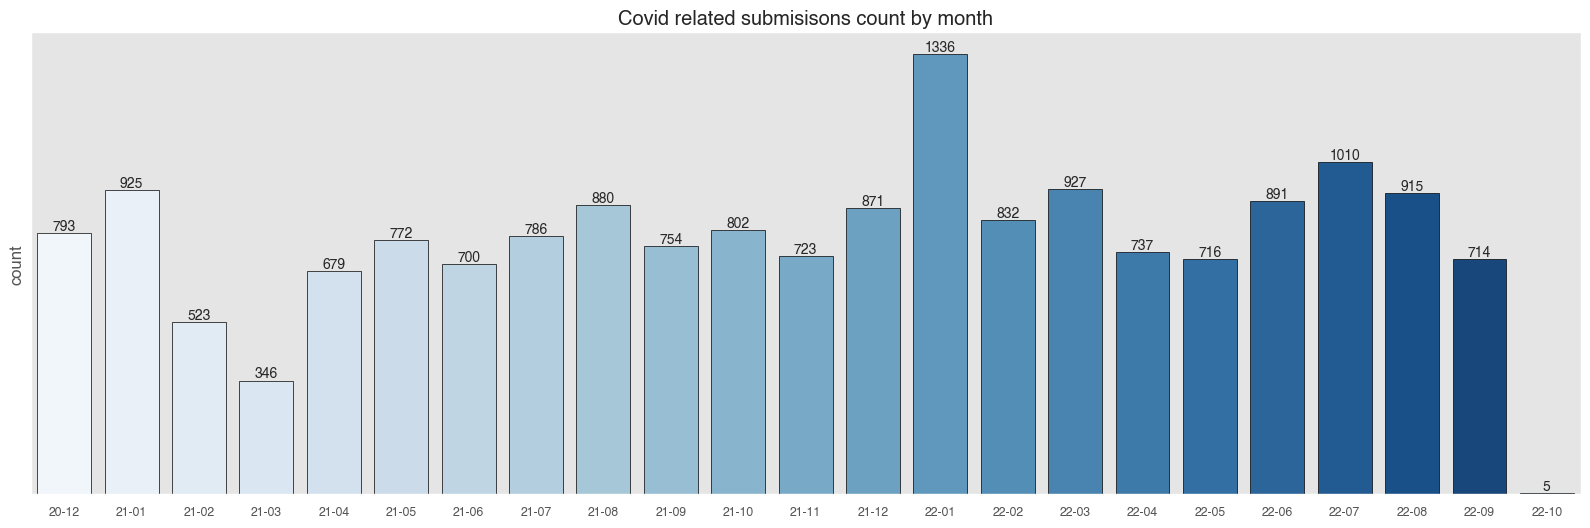

In [146]:
covid_submissions_per_month = df_filtered_covid['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

plt.figure(figsize=(20,6))
ax = sns.barplot(x='index', y='counts', data=covid_submissions_per_month, edgecolor='black', palette='Blues')
plt.title('Covid related submisisons count by month')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')

plt.show();

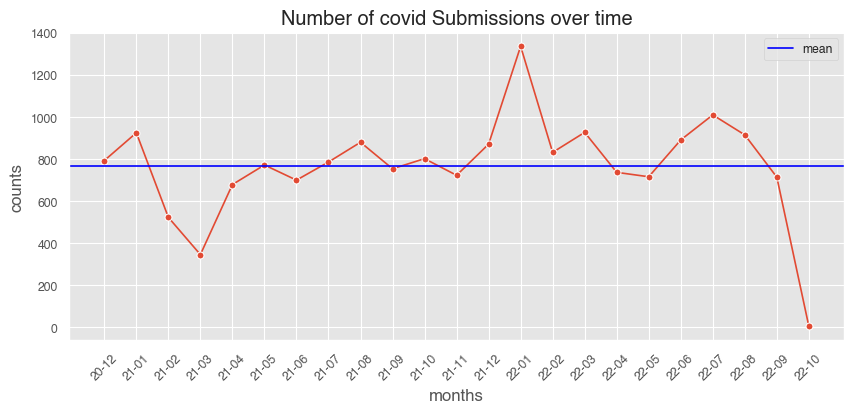

In [145]:
covid_submissions_per_month = df_filtered_covid['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts')

covid_ubmissions_per_month_df = pd.DataFrame(covid_submissions_per_month)

covid_ubmissions_per_month_df = covid_ubmissions_per_month_df.rename(columns={'index': 'months'}).reset_index()

plt.figure(figsize=(10, 4))
plt.title('Number of covid related submissions over time')
sns.lineplot(x=covid_ubmissions_per_month_df.months, y=covid_ubmissions_per_month_df.counts, marker='o', markersize=5);
plt.xticks(rotation = 45)
plt.axhline(covid_ubmissions_per_month_df.counts.mean(), color='b', label='mean')

plt.legend()
plt.show();

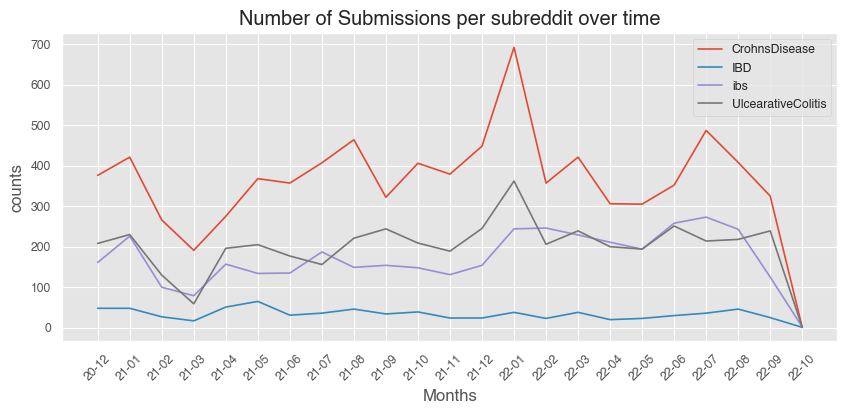

In [159]:
covid_subs_per_month_per_subreddits = []

df_covid_crohns = df_filtered_covid[df_filtered_covid['subreddit'] == 'CrohnsDisease']
df_covid_ibd = df_filtered_covid[df_filtered_covid['subreddit'] == 'IBD']
df_covid_ibs = df_filtered_covid[df_filtered_covid['subreddit'] == 'ibs']
df_covid_ulc = df_filtered_covid[df_filtered_covid['subreddit'] == 'UlcerativeColitis']

covid_subs_per_month_per_subreddits.append(df_covid_crohns['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
covid_subs_per_month_per_subreddits.append(df_covid_ibd['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
covid_subs_per_month_per_subreddits.append(df_covid_ibs['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))
covid_subs_per_month_per_subreddits.append(df_covid_ulc['created'].dt.strftime('%y-%m').value_counts().sort_index().reset_index(name='counts'))

plt.figure(figsize=(10, 4))
plt.title('Number of Submissions per subreddit over time')
sns.lineplot(x='index', y='counts', data=covid_subs_per_month_per_subreddits[0], label='CrohnsDisease');
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=covid_subs_per_month_per_subreddits[1], label='IBD');
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=covid_subs_per_month_per_subreddits[2], label='ibs');
plt.xticks(rotation = 45)

sns.lineplot(x='index', y='counts', data=covid_subs_per_month_per_subreddits[3], label='UlcearativeColitis');
plt.xticks(rotation = 45)

plt.xlabel('Months')
plt.show();

In [178]:
fav_posts = df_filtered_covid[['title', 'author', 'subreddit', 'score', 'num_comments']].sort_values(by='score', ascending=False)
fav_posts.dropna(inplace=True)
fav_posts.num_comments = fav_posts.num_comments.astype('int64')
print(colored('\nSubmissions about covid with more comments', color='blue'))
display(fav_posts.iloc[0:10])

,title,author,subreddit,score,num_comments
434,I'm getting the Pfizer vaccine tomorrow,LetsEatPizza,CrohnsDisease,562,99
34411,Anyone else get sudden cold sweats and have to...,mrmanagesir,ibs,345,110
8594,You Need To Fight.,YoullForgetAnyways,CrohnsDisease,305,61
7350,I've Had IBS for 10 Years: Here's What I've Le...,enthusedandexhausted,ibs,287,120
291,I've had the Pfizer/BioNTech COVID-19 vaccine!,BodieJaker,CrohnsDisease,279,91
3922,PSA: Endometriosis is commonly misdiagnosed as...,meestahmoostah,ibs,273,57
24030,How many Covid screening tests have you lied on?,Smil3yAngel,ibs,267,57
9915,I’m a fully vaxxed Crohnie and I tested positi...,alaf21,CrohnsDisease,237,35
4898,Just wanted to express my awe at how tough and...,TuckerMarx,CrohnsDisease,235,14
21275,Can science hurry the *uck up and find a solut...,Ok-Tour-9284,ibs,231,81


## Sentiment Analysis <a class='anchor' id='sentiment-analysis'></a>

[Back to top](#back-to-top)

In [529]:
import re, string
import emoji
import scipy
import nltk
from statistics import mean

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA_VADER
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer as SIA_NLTK
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist 

#plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

In [522]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('shakespeare')
#nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words("english")

In [384]:
df = pd.concat([df_submissions, df_comments])

body_data = df[['id', 'body', 'created']].copy()
title_data = df[['id', 'title', 'created']].copy()

body_data.rename(columns={'body': 'text'}, inplace=True)
title_data.rename(columns={'title': 'text'}, inplace=True)

In [385]:
path = './submissions_scraped/'

files = []
for filename in os.listdir(path):
    files.append(pd.read_csv(os.path.join(path, filename)))
    
files = pd.concat(files)
df_submissions = pd.DataFrame(files)
df_submissions.drop(columns=['Unnamed: 0'], inplace=True)
df_submissions.dropna(inplace=True)

In [386]:
df_comments = pd.read_csv('./comments_scraped/comments.csv')
df_comments.drop(columns=['Unnamed: 0'], inplace=True)
df_comments.dropna(inplace=True)

Data are reimported, eventually this section of the notebook could be removed and run separetely

### Raw analysis with vader algorithm <a class='anchor' id='raw-sa-with-vader'></a>

[Back to top](#back-to-top)

In [387]:
sia_vader = SIA_VADER()

In [388]:
sentiments_sub = []
for post in df_submissions.body:
    sentiment_dict = sia_vader.polarity_scores(post)
    sentiment_dict.pop('compound', None)
    sentiments_sub.append(max(sentiment_dict , key=sentiment_dict.get))

In [389]:
sentiments_comm = []
for post in df_comments.body:
    sentiment_dict = sia_vader.polarity_scores(post)
    sentiment_dict.pop('compound', None)
    sentiments_comm.append(max(sentiment_dict , key=sentiment_dict.get))

In [390]:
print(colored('\nRaw analysis on submissions', color='blue'))
df_submissions['raw_vader'] = sentiments_sub
display(df_submissions.raw_vader.value_counts())

print(colored('\nRaw analysis on comments', color='blue'))
df_comments['raw_vader'] = sentiments_comm
display(df_comments.raw_vader.value_counts())


Raw analysis on submissions


neu    47575
pos       88
neg       58
Name: raw_vader, dtype: int64


Raw analysis on comments


neu    319787
pos      9607
neg      2458
Name: raw_vader, dtype: int64

### Data cleaning <a class='anchor' id='data-cleaning'></a>

[Back to top](#back-to-top)

In [391]:
def clean_text(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower()
    text = re.sub('^\[removed\]|^\[deleted\]', '', str(text))
    text = re.sub('^\[deleted by user\]', '', str(text))
    text = re.sub(r'#', '',  str(text))
    text = re.sub(r"(?:\@|https?\://)\S+", "", str(text))
    text = re.sub(r'[^\x00-\x7f]',r'', str(text))
    text = re.sub(r'www\S+', '',  str(text)) 
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

In [392]:
def remove_mult_spaces(text): 
    return re.sub("\s\s+" , " ", text)

In [393]:
%%capture

submissions_body_cleaned = []
for t in df_submissions.body:
    submissions_body_cleaned.append(clean_text(t))
    

comments_body_cleaned = []
for t in df_comments.body:
    comments_body_cleaned.append(clean_text(t))

#df_submissions.body = df_submissions.body.apply(remove_mult_spaces)
#df_comments.body = df_comments.body.apply(remove_mult_spaces)

df_submissions = df_submissions[df_submissions['body'] != '']
df_comments = df_comments[df_comments['body'] != '']

df_submissions['body_clean'] = submissions_body_cleaned
df_comments['body_clean'] = comments_body_cleaned

### Analysis with vader <a class='anchor' id='sa-with-vader'></a>

[Back to top](#back-to-top)

In [394]:
sia_vader = SIA_VADER()

In [395]:
sentiments_sub = []
for post in df_submissions.body_clean:
    sentiment_dict = sia_vader.polarity_scores(post)
    sentiment_dict.pop('compound', None)
    sentiments_sub.append(max(sentiment_dict , key=sentiment_dict.get))

In [396]:
sentiments_comm = []
for post in df_comments.body_clean:
    sentiment_dict = sia_vader.polarity_scores(post)
    sentiment_dict.pop('compound', None)
    sentiments_comm.append(max(sentiment_dict , key=sentiment_dict.get))

In [397]:
print(colored('\nVader algorithm with cleaned submissions', color='blue'))
df_submissions['sentiment_vader'] = sentiments_sub
display(df_submissions.sentiment_vader.value_counts())

print(colored('\nVader algorithm with cleaned comments', color='blue'))
df_comments['sentiment_vader'] = sentiments_comm
display(df_comments.sentiment_vader.value_counts())


Vader algorithm with cleaned submissions


neu    45633
neg     2001
pos       87
Name: sentiment_vader, dtype: int64


Vader algorithm with cleaned comments


neu    319640
pos      9125
neg      3087
Name: sentiment_vader, dtype: int64

That's great because the algorithm seems to react to data cleaning.  

### Analysis with nltk <a class='anchor' id='sa-with-nltk'></a>

[Back to top](#back-to-top)

In [398]:
sia_nltk = SIA_NLTK()

In [399]:
sentiments_sub = []
for post in df_submissions.body_clean:
    sentiment_dict = sia_nltk.polarity_scores(post)
    sentiment_dict.pop('compound', None)
    sentiments_sub.append(max(sentiment_dict , key=sentiment_dict.get))

In [400]:
sentiments_comm = []
for post in df_comments.body_clean:
    sentiment_dict = sia_nltk.polarity_scores(post)
    sentiment_dict.pop('compound', None)
    sentiments_comm.append(max(sentiment_dict , key=sentiment_dict.get))

In [401]:
print(colored('\nNltk algorithm with cleaned submissions', color='blue'))
df_submissions['sentiment_nltk'] = sentiments_sub
display(df_submissions.sentiment_nltk.value_counts())

print(colored('\nNltk algorithm with cleaned comments', color='blue'))
df_comments['sentiment_nltk'] = sentiments_comm
display(df_comments.sentiment_nltk.value_counts())


Nltk algorithm with cleaned submissions


neu    45605
neg     2016
pos      100
Name: sentiment_nltk, dtype: int64


Nltk algorithm with cleaned comments


neu    318152
pos     10057
neg      3643
Name: sentiment_nltk, dtype: int64

Quite similar results with ntlk.  

However not happy beacuse the post labelled as 'neutral' are so much, so let's try with the last one.

### Analysis with TextBlob <a class='anchor' id='sa-with-tb'></a>

[Back to top](#back-to-top)

In [402]:
def polarity_to_text(blob):
    if (blob.sentiment.polarity > 0.1):
        return 'pos'
    elif(blob.sentiment.polarity <= 0.1 and  blob.sentiment.polarity >= -0.05):
        return 'neu'
    else:
        return 'neg'

In [403]:
sentiments_sub = []
for post in df_submissions.body_clean:
    blob = TextBlob(post)
    sentiments_sub.append(polarity_to_text(blob))

In [404]:
sentiments_comm = []
for post in df_comments.body_clean:
    blob = TextBlob(post)
    sentiments_comm.append(polarity_to_text(blob))

In [405]:
print(colored('\nTextBlob algorithm with cleaned submissions', color='blue'))
df_submissions['sentiment_tb'] = sentiments_sub
display(df_submissions.sentiment_tb.value_counts())

print(colored('\nTextBlob algorithm with cleaned comments', color='blue'))
df_comments['sentiment_tb'] = sentiments_comm
display(df_comments.sentiment_tb.value_counts())


TextBlob algorithm with cleaned submissions


neu    23344
pos    13036
neg    11341
Name: sentiment_tb, dtype: int64


TextBlob algorithm with cleaned comments


neu    140098
pos    123989
neg     67765
Name: sentiment_tb, dtype: int64

With TextBlob much more data are labelled as 'poitive' or 'negative'

### Analysis with roBERTa  <a class='anchor' id='sa-with-roberta'></a>

[Back to top](#back-to-top)

roBERTa is a model pre-trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. 

In [407]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [442]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)
labels = ['neg', 'neu', 'pos']

In [466]:
sentiments_sub = []
for post in tqdm.tqdm(df_submissions.body_clean, desc='Analyzing with roBERTa'):
    encoded_post = tokenizer(post, return_tensors='pt', max_length=512)
    output = model(**encoded_post)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    sentiments_sub.append(labels[np.argmax(scores)])

Analyzing with roBERTa: 100%|███████████| 47721/47721 [1:36:57<00:00,  8.20it/s]


In [468]:
print(colored('\nroBERTa model with cleaned submissions', color='blue'))
df_submissions['sentiment_roberta'] = sentiments_sub
display(df_submissions.sentiment_roberta.value_counts())


roBERTa model with cleaned submissions


neg    27674
neu    14602
pos     5445
Name: sentiment_roberta, dtype: int64

roBERTa model is so much slower than the others, so it would be hard to process all the comments, maybe in the future with more computational power 

### Wordclouds <a class='anchor' id='wordcloud-subs'></a>

[Back to top](#back-to-top)

In [517]:
body_pos_vader = " ".join(sentiment for sentiment in df_submissions[df_submissions['sentiment_vader'] == 'pos']['body_clean'])
body_pos_nltk = " ".join(sentiment for sentiment in df_submissions[df_submissions['sentiment_nltk'] == 'pos']['body_clean'])
body_pos_tb = " ".join(sentiment for sentiment in df_submissions[df_submissions['sentiment_tb'] == 'pos']['body_clean'])
body_pos_roberta = " ".join(sentiment for sentiment in df_submissions[df_submissions['sentiment_roberta'] == 'pos']['body_clean'])

In [523]:
wordcloud_vader_pos = WordCloud(width=800,
                      stopwords=stopwords,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(body_pos_vader)

wordcloud_nltk_pos = WordCloud(width=800,
                      stopwords=stopwords,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(body_pos_nltk)

wordcloud_blob_pos = WordCloud(width=800,
                      stopwords=stopwords,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(body_pos_tb)

wordcloud_roberta_pos = WordCloud(width=800,
                      stopwords=stopwords,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(body_pos_roberta)

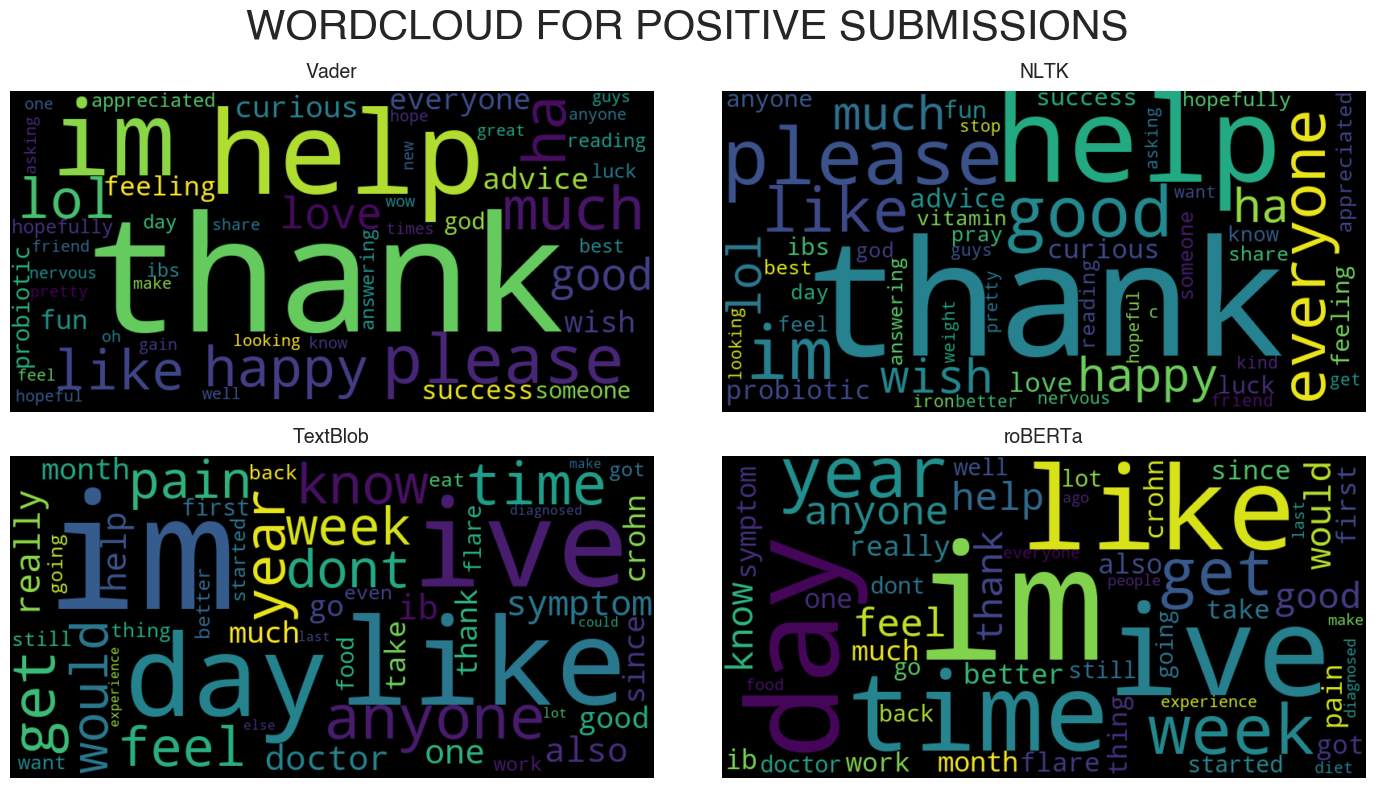

In [530]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
plt.suptitle('WORDCLOUD FOR POSITIVE SUBMISSIONS', fontsize=30)

ax[0,0].imshow(wordcloud_vader_pos, interpolation="bilinear")
ax[0,0].axis("off")
ax[0,0].set_title('Vader')

ax[0,1].imshow(wordcloud_nltk_pos, interpolation="bilinear")
ax[0,1].axis("off")
ax[0,1].set_title('NLTK')

ax[1,0].imshow(wordcloud_blob_pos, interpolation="bilinear")
ax[1,0].axis("off")
ax[1,0].set_title('TextBlob')


ax[1,1].imshow(wordcloud_roberta_pos, interpolation="bilinear")
ax[1,1].axis("off")
ax[1,1].set_title('roBERTa')

plt.tight_layout()
plt.show()

Considering the wordclouds it seems that **vader** and **ntlk** labelled as positive those submissions containing meaningfull positive words.
Instead observing **textblob** and **roBERTa** wordclouds there are no particular words which remind something postive

In [489]:
df_submissions[df_submissions['sentiment_vader'] == 'pos'].body.sample(5)

16301    Today I had my first bowel movement without an...
2154     Hi everyone! My name is Tiffany, I'm a member ...
1793     26m, dx. 2013, wondering if anyone else has ha...
16604    The time has come once again for another colon...
12965    Hi everyone, I hope you’re doing as well as yo...
Name: body, dtype: object

In [490]:
df_submissions[df_submissions['sentiment_nltk'] == 'pos'].body.sample(5)

11671                                       Pray 4 my body
32641                         Amazing. IBS is so much fun.
13512    Most IBS patients suffer from SIBO. It may hel...
4904     For me it’s vitamin c (along with iron, vitami...
13526    First infusion today, wish me luck.. I have an...
Name: body, dtype: object

In [491]:
df_submissions[df_submissions['sentiment_tb'] == 'pos'].body.sample(5)

19683    I'm thinking about going gluten free again. An...
14915    I’ve been having lower back when when peeing, ...
2327     Allergic to psyllium which is a bummer bc it r...
12818    I usually go to the same hospital where they k...
1881     A success story because I finally had a nice s...
Name: body, dtype: object

In [492]:
df_submissions[df_submissions['sentiment_roberta'] == 'pos'].body.sample(5)

3043     Hi I just started an infliximab biosimilar at ...
8325     Hello,\n\nI've been doing some reading, and fo...
7069     9 years, a bad doc (hindsight) for most of it,...
17289    I have IBS-M. Good news is I haven't had diarr...
21066    I'd love to know what benefits you've gotten f...
Name: body, dtype: object

Some submissions overtake the algorithms cause are rich of sarcasm

In [525]:
df_all_pos = df_submissions[(df_submissions['sentiment_vader'] == 'pos') 
                            & (df_submissions['sentiment_nltk'] == 'pos') 
                            & (df_submissions['sentiment_tb'] == 'pos') 
                            & (df_submissions['sentiment_roberta'] == 'pos')]

In [526]:
body_all_pos = " ".join(sentiment for sentiment in df_all_pos['body_clean'])

In [527]:
wordcloud_pos = WordCloud(width=800,
                      stopwords=stopwords,
                      height=400,
                      max_font_size=200,
                      max_words=50,
                      collocations=False,
                      background_color='black').generate(body_all_pos)

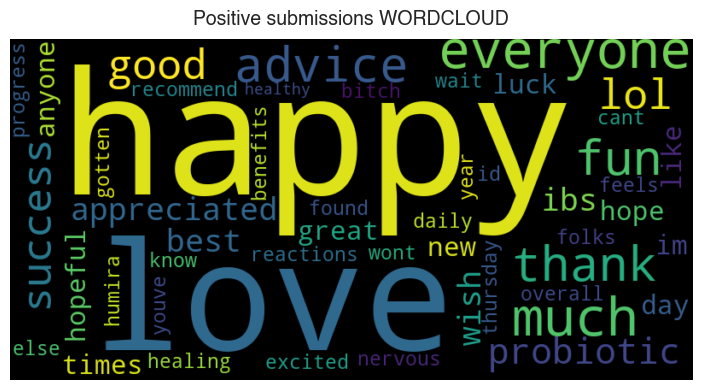

In [532]:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title('Positive submissions WORDCLOUD')
plt.show()

This is the wordcloud obtained combining the results from the different algorithms.   
Only those submissions evaluated postively by all the four algorithms.

In [241]:
# Clean data
#body_data = body_data.dropna()
#title_data = title_data.dropna()

#title_data.text = title_data.text.str.lower()
#body_data.text = body_data.text.str.lower()

#body_data.text = body_data.text.apply(clean_text)
#title_data.text = title_data.text.apply(clean_text)

#body_data = body_data[body_data['text'] != '']
#title_data = title_data[title_data['text'] != '']

In [44]:
# Tokenize
def tokenize(data):
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+http\S+')
    data['tokenized'] = data['text'].apply(lambda x: tokenizer.tokenize(x))
    return data

In [45]:
# Remove stopwords 
def remove_sw(data):
    data['token_without_sw'] = data['tokenized'].apply(lambda x: [word for word in x if not word in stopwords and len(word) > 2 and not word in ["www", "http", "https", "reddit", "cricket", "nan"]])
    return data

In [46]:
# Lemmatize
def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    data['lemmatized_tokens'] = data['token_without_sw'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
    return data

In [47]:
tokenize(body_data)
tokenize(title_data)

remove_sw(body_data)
remove_sw(title_data)

,id,text,created,tokenized,token_without_sw
0,k4vtmp,berberine,2020-12-01 23:30:39,[berberine],[berberine]
1,k4vq6z,has anyone experienced this? symptoms changing...,2020-12-01 23:26:03,"[has, anyone, experienced, this, symptoms, cha...","[anyone, experienced, symptoms, changing, with..."
3,k4uceq,running to the toilet be like,2020-12-01 22:17:28,"[running, to, the, toilet, be, like]","[running, toilet, like]"
4,k4rnfg,mesalamine enemas,2020-12-01 20:08:55,"[mesalamine, enemas]","[mesalamine, enemas]"
5,k4pz3y,elimination diet,2020-12-01 18:50:45,"[elimination, diet]","[elimination, diet]"
...,...,...,...,...,...
36578,xqu5l0,how bad should this hurt?,2022-09-29 03:12:04,"[how, bad, should, this, hurt]","[bad, hurt]"
36579,xqt68w,ibs or symptoms of something else? confused an...,2022-09-29 02:28:06,"[ibs, or, symptoms, of, something, else, confu...","[ibs, symptoms, something, else, confused, see..."
36580,xqt4x0,ibs symptoms or something else?,2022-09-29 02:26:19,"[ibs, symptoms, or, something, else]","[ibs, symptoms, something, else]"
36581,xqsc63,why am i being told famatodine is the only med...,2022-09-29 01:50:27,"[why, am, i, being, told, famatodine, is, the,...","[told, famatodine, medication, ibs]"


### FREQUENCY DISTRIBUTION

In [48]:
all_words = " ".join(x for x in body_data['token_without_sw'].apply(lambda x: " ".join(x))).split(" ")
title_words = " ".join(x for x in title_data['token_without_sw'].apply(lambda x: " ".join(x))).split(" ")
all_words.extend(title_words)
all_words.remove('')

fd = nltk.FreqDist([w.lower() for w in all_words])

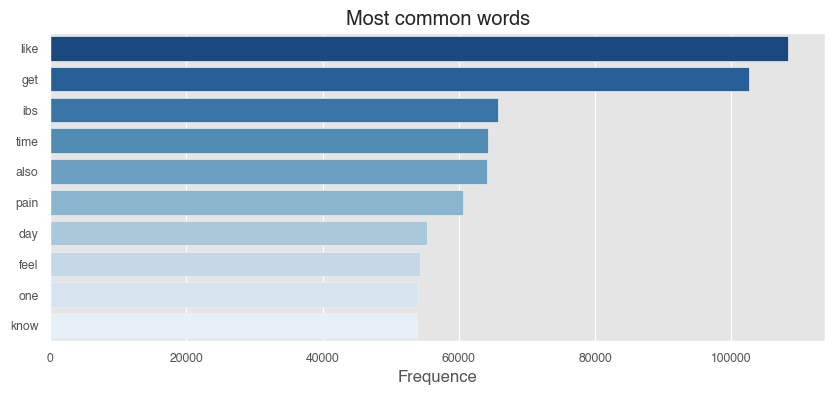

In [49]:
# Most common words
pos_freq = dict(fd.most_common(10))
pos_freq = pd.Series(pos_freq)

fig, ax = plt.subplots(figsize=(10,4))

# Plot 1
ax.set_title('Most common words')
sns.barplot(y=pos_freq.index, x=pos_freq, orient='h', ax=ax, palette='Blues_r')
ax.set_xlabel('Frequence')

plt.show();

### Concordances and Trigrams

- In the context of NLP, a concordance is a collection of word locations along with their context.

- Trigrams are four words combinations 

The stopwords are not removed in this case to better represent the concordances and the trigrams

In [50]:
all_words = " ".join(x for x in body_data['tokenized'].apply(lambda x: " ".join(x))).split(" ")

In [51]:
text = nltk.Text(all_words)

In [52]:
print(colored('\nSOME CONCORDANCES\n', color='blue'))
doctor_conc = text.concordance('doctor', lines=5)
print('\n')
covid_conc = text.concordance('covid', lines=5)
print('\n')
hope_conc = text.concordance('hope', lines=5)
print('\n')
hope_conc = text.concordance('like', lines=5)


SOME CONCORDANCES

Displaying 5 of 44949 matches:
 had no signs of inflammation so my doctor is sending me to do a colonoscopy m
 consult i really did not like this doctor he wants me to stay on prednisone s
hat my current old gi says this new doctor also told me to do my first stelara
 to really struggle to find a great doctor i have a consult with another gi on
 after a flexible sigmoidoscopy the doctor was caught off guard i have been on


Displaying 5 of 9648 matches:
ermometer i even tested negative for covid which i took just to be cautious i m
 many times its good that because of covid i am allowed to wfh but when covid e
f covid i am allowed to wfh but when covid ends i don t think i will be able to
m sure i won t be having a job after covid half of my time is spent me sitting 
 have you took any blood thinner for covid if yes which one my infusion went we


Displaying 5 of 21125 matches:
ny adverse affects after taking it i hope this message doesn t upset anyone in
f side eff

In [54]:
trigram = nltk.collocations.TrigramCollocationFinder.from_words(all_words)

KeyboardInterrupt: 

In [ ]:
trigram.ngram_fd.most_common(10)

### Analysis with vader

Vader (Valence Aware Dictionary and sEntiment Reasoner) is a pretrained model suitable for social media messages, like short sentences, slang and abbreviations

In [ ]:
def is_positive(text):
    scores = [
        sia.polarity_scores(sentence)['compound'] 
        for sentence in nltk.sent_tokenize(text)
    ]
    if len(scores) > 0:
        if mean(scores) > 0.1:
            return 1
        elif mean(scores) < -0.1:
            return -1
        else:
            return 0
    else: 
        return 0

In [ ]:
def sia_with_tokenization(data):
    data['pool_score'] = data['token_without_sw'].apply(lambda x: [sia.polarity_scores(w).get('compound') for w in x]) 
    data['label_tokenization'] = 0
    data.loc[data['pool_score'].apply(lambda x: np.mean(x) > 0.1), 'label_tokenization'] = 1
    data.loc[data['pool_score'].apply(lambda x: np.mean(x) < 0.1), 'label_tokenization'] = -1

In [ ]:
%%capture

body_data['label'] = [is_positive(x) for x in body_data['text']]
title_data['label'] = [is_positive(x) for x in title_data['text']]

In [ ]:
sia_with_tokenization(body_data)
sia_with_tokenization(title_data)

In [ ]:
fig, [ax1, ax2] = plt.subplots(figsize=(9,4), nrows=1, ncols=2)

# Plot 1
ax1.set_title('Body data')
counts_body = body_data.label.value_counts(normalize=True) * 100
sns.barplot(x=counts_body.index, y=counts_body, ax=ax1)
ax1.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax1.set_ylabel('Percentage')

# Plot 2
ax2.set_title('Title data')
counts_title = title_data.label.value_counts(normalize=True) * 100
sns.barplot(x=counts_title.index, y=counts_title, ax=ax2)
ax2.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax2.set_ylabel('Percentage')

plt.show();

In [ ]:
all_words = " ".join(x for x in body_data['token_without_sw'].apply(lambda x: " ".join(x))).split(" ")
positive_words = " ".join(x for x in body_data[body_data['label_tokenization'] == 1]['token_without_sw'].apply(lambda x: " ".join(x))).split(" ")
negative_words = " ".join(x for x in body_data[body_data['label_tokenization'] == -1]['token_without_sw'].apply(lambda x: " ".join(x))).split(" ")

pos_freq = FreqDist(positive_words).most_common(10)
neg_freq = FreqDist(negative_words).most_common(10)
#print('pos_freq\n', pos_freq)
#print('neg_freq\n', neg_freq)

In [ ]:
pos_freq = dict(pos_freq)
pos_freq = pd.Series(pos_freq)

neg_freq = dict(neg_freq)
neg_freq = pd.Series(neg_freq)

fig, [ax1, ax2] = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

# Plot 1
ax1.set_title('Positive words')
sns.barplot(y=pos_freq.index, x=pos_freq, orient='h', ax=ax1, palette='viridis_r')
ax1.set_xlabel('Frequence')

#Plot 2
ax2.set_title('Negative words')
sns.barplot(y=neg_freq.index, x=neg_freq, orient='h', ax=ax2, palette='viridis')
ax2.set_xlabel('Frequence')

plt.show()

In [ ]:
word = 'I do not like hamburger'

sia = SIA()
sia.polarity_scores(word)

stopwords

In [ ]:
df_roberta = pd.concat([body_data, title_data])

In [ ]:
df_roberta['']

### Covid filtering and specific analysis

In [ ]:
df_filtered_covid = df[[find_keyword(str(p)) for p in df.body]]

In [ ]:
filtered_body = df_filtered_covid[['id', 'body', 'created']].copy()
filtered_title = df_filtered_covid[['id', 'title', 'created']].copy()

filtered_body.rename(columns={'body': 'text'}, inplace=True)
filtered_title.rename(columns={'title': 'text'}, inplace=True)

In [ ]:
filtered_body = filtered_body.dropna()
filtered_title = title_data.dropna()

filtered_body.text = filtered_body.text.str.lower()
filtered_title.text = filtered_title.text.str.lower()

filtered_body.text = filtered_body.text.apply(clean_text)
filtered_title.text = filtered_title.text.apply(clean_text)

In [ ]:
tokenize(data=filtered_body)
remove_sw(data=filtered_body)
evaluate_with_sia(data=filtered_body);

In [ ]:
fig, ax1 = plt.subplots(figsize=(4,4), nrows=1, ncols=1)

# Plot 1
ax1.set_title('Body data')
counts_body = filtered_body.label.value_counts(normalize=True) * 100
sns.barplot(x=counts_body.index, y=counts_body, ax=ax1)
ax1.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax1.set_ylabel('Percentage')

plt.show();

In [ ]:
all_words = " ".join(x for x in filtered_body['token_without_sw'].apply(lambda x: " ".join(x))).split(" ")
positive_words = " ".join(x for x in filtered_body[filtered_body['label'] == 1]['token_without_sw'].apply(lambda x: " ".join(x))).split(" ")
negative_words = " ".join(x for x in filtered_body[filtered_body['label'] == -1]['token_without_sw'].apply(lambda x: " ".join(x))).split(" ")

pos_freq = FreqDist(positive_words).most_common(5)
neg_freq = FreqDist(negative_words).most_common(5)
#print('pos_freq\n', pos_freq)
#print('neg_freq\n', neg_freq)

In [ ]:
pos_freq = dict(pos_freq)
pos_freq = pd.Series(pos_freq)

neg_freq = dict(neg_freq)
neg_freq = pd.Series(neg_freq)

fig, [ax1, ax2] = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

# Plot 1
ax1.set_title('Positive words')
sns.barplot(y=pos_freq.index, x=pos_freq, orient='h', ax=ax1)
ax1.set_xlabel('Frequence')

#Plot 2
ax2.set_title('Negative words')
sns.barplot(y=neg_freq.index, x=neg_freq, orient='h', ax=ax2)
ax2.set_xlabel('Frequence')

plt.show()

In [ ]:
dates_df_cov = filtered_body.astype({'created': 'datetime64[D]'})
dates_cov = filtered_body.astype({"created":"datetime64[D]"}).created.unique()
positive_posts_covid = dates_df_cov[dates_df_cov['label'] == 1]
negative_posts_covid = dates_df_cov[dates_df_cov['label'] == -1]

neutral_posts_covid